Source: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [3]:
train = pd.read_csv('C:\\Users\\Riyansika\\Desktop\\mith exam\\mith time series\\data.csv')
train.drop('Unnamed: 0',inplace=True,axis=1)
train.head()

,date,department_identifier,category_of_product,state,sales,outlet,product_identifier,week_id,sell_price,month,day,dayofweek,year,quarter
0,2012-01-01,11,others,Maharashtra,0,111,74,49,2.94,1,1,6,2012,1
1,2012-01-01,11,others,Maharashtra,1,111,337,49,7.44,1,1,6,2012,1
2,2012-01-01,12,others,Maharashtra,0,111,423,49,0.97,1,1,6,2012,1
3,2012-01-01,12,others,Maharashtra,0,111,432,49,4.97,1,1,6,2012,1
4,2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,581,49,4.88,1,1,6,2012,1


In [4]:
monthly_shop_sales=train.groupby(["date","outlet"])["sales"].sum()
# get the shops to the columns
monthly_shop_sales=monthly_shop_sales.unstack(level=1)
monthly_shop_sales=monthly_shop_sales.fillna(0)
dates=monthly_shop_sales.index
monthly_shop_sales.index=dates
monthly_shop_sales=monthly_shop_sales.reset_index()
monthly_shop_sales

outlet,date,111,112,113,114,221,222,223,331,332,333
0,2012-01-01,35,93,114,37,100,96,38,53,37,51
1,2012-01-02,93,123,115,44,71,79,73,86,71,105
2,2012-01-03,61,64,110,49,49,92,39,43,43,71
3,2012-01-04,66,72,82,42,54,67,72,49,127,66
4,2012-01-05,60,66,100,29,57,55,88,53,90,84
...,...,...,...,...,...,...,...,...,...,...,...
785,2014-02-24,59,38,70,52,40,58,35,40,59,32
786,2014-02-25,60,27,91,24,28,62,26,27,57,34
787,2014-02-26,42,42,65,49,31,37,29,33,68,31
788,2014-02-27,37,36,74,34,31,35,35,37,62,29


In [5]:
[monthly_shop_sales.iloc[:,10]]

[0       51
 1      105
 2       71
 3       66
 4       84
       ... 
 785     32
 786     34
 787     31
 788     29
 789     49
 Name: 333, Length: 790, dtype: int64]

In [6]:
from fbprophet import Prophet
import time
start_time=time.time()

# Calculating the base forecasts using prophet
# From HTSprophet pachage -- https://github.com/CollinRooney12/htsprophet/blob/master/htsprophet/hts.py
forecastsDict = {}
for node in np.arange(0,10,1):
    # take the date-column and the col to be forecasted
    nodeToForecast = pd.concat([monthly_shop_sales.iloc[:,0], monthly_shop_sales.iloc[:, node+1]], axis = 1)
#     print(nodeToForecast.head())  # just to check
# rename for prophet compatability
    nodeToForecast = nodeToForecast.rename(columns = {nodeToForecast.columns[0] : 'ds'})
    nodeToForecast = nodeToForecast.rename(columns = {nodeToForecast.columns[1] : 'y'})
    growth = 'linear'
    m = Prophet(growth, yearly_seasonality=True)
    m.fit(nodeToForecast)
    future = m.make_future_dataframe(periods = 31, freq = 'D')
    forecastsDict[node] = m.predict(future)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasona

In [7]:
forecastsDict[node]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,87.286121,73.289368,134.230657,87.286121,87.286121,16.573300,16.573300,16.573300,9.788176,9.788176,9.788176,6.785123,6.785123,6.785123,0.0,0.0,0.0,103.859420
1,2012-01-02,87.208242,62.837379,119.724308,87.208242,87.208242,3.648271,3.648271,3.648271,-3.239560,-3.239560,-3.239560,6.887832,6.887832,6.887832,0.0,0.0,0.0,90.856514
2,2012-01-03,87.130364,55.623618,113.302442,87.130364,87.130364,-2.110716,-2.110716,-2.110716,-8.982033,-8.982033,-8.982033,6.871317,6.871317,6.871317,0.0,0.0,0.0,85.019648
3,2012-01-04,87.052485,52.496874,111.956268,87.052485,87.052485,-4.569230,-4.569230,-4.569230,-11.306975,-11.306975,-11.306975,6.737745,6.737745,6.737745,0.0,0.0,0.0,82.483255
4,2012-01-05,86.974607,57.225414,113.135100,86.974607,86.974607,-0.660634,-0.660634,-0.660634,-7.152431,-7.152431,-7.152431,6.491798,6.491798,6.491798,0.0,0.0,0.0,86.313973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,2014-03-27,41.230002,-0.919990,59.404094,41.182935,41.263740,-12.111426,-12.111426,-12.111426,-7.152431,-7.152431,-7.152431,-4.958995,-4.958995,-4.958995,0.0,0.0,0.0,29.118576
817,2014-03-28,41.211154,9.586332,71.056474,41.160836,41.247838,-1.908627,-1.908627,-1.908627,3.711318,3.711318,3.711318,-5.619945,-5.619945,-5.619945,0.0,0.0,0.0,39.302526
818,2014-03-29,41.192305,23.577997,80.955121,41.137414,41.232475,10.786848,10.786848,10.786848,17.181505,17.181505,17.181505,-6.394657,-6.394657,-6.394657,0.0,0.0,0.0,51.979153
819,2014-03-30,41.173457,12.637250,74.377471,41.114476,41.215556,2.515713,2.515713,2.515713,9.788176,9.788176,9.788176,-7.272463,-7.272463,-7.272463,0.0,0.0,0.0,43.689170


In [8]:
nCols = len(list(forecastsDict.keys()))+1
for key in range(0, nCols-1):
    f1 = np.array(forecastsDict[key].yhat)
    f2 = f1[:, np.newaxis]
    if key==0:
        predictions=f2.copy()
       # print(predictions.shape)
    else:
        predictions = np.concatenate((predictions, f2), axis = 1)

In [14]:
predictions

array([[ 90.93086106,  95.6111588 , 138.62431437, ...,  75.88811828,
         73.34530315, 103.8594203 ],
       [ 73.22411909,  67.10577241, 118.05185372, ...,  60.46197747,
         58.37099735,  90.85651364],
       [ 64.27049483,  63.5979437 , 109.17489304, ...,  55.817722  ,
         58.23507613,  85.01964781],
       ...,
       [ 91.14099593,  71.12114099, 104.43963952, ...,  64.00827297,
         97.79111502,  51.97915306],
       [ 87.51430255,  61.6771492 , 108.02721938, ...,  53.35732923,
         93.21586084,  43.68917033],
       [ 70.63560691,  33.73518456,  87.85433886, ...,  39.28277388,
         77.96035489,  29.6750669 ]])

In [17]:
predictions_unknown=predictions[-2]
predictions_unknown

array([ 87.51430255,  61.6771492 , 108.02721938,  47.78520228,
        53.29890217,  55.25227136,  34.27482957,  53.35732923,
        93.21586084,  43.68917033])

In [18]:
cal=['111','112','113','114','221','222','223','331','332','333']

In [19]:
predictions = pd.DataFrame(predictions,columns=cal)
predictions

,111,112,113,114,221,222,223,331,332,333
0,90.930861,95.611159,138.624314,40.503150,79.597124,100.320628,73.614999,75.888118,73.345303,103.859420
1,73.224119,67.105772,118.051854,34.460129,61.674759,78.425730,66.068377,60.461977,58.370997,90.856514
2,64.270495,63.597944,109.174893,29.987286,57.090574,69.714651,61.096650,55.817722,58.235076,85.019648
3,60.171801,63.403526,106.901301,30.886329,57.139723,68.570297,59.214731,54.322140,58.830710,82.483255
4,60.181467,64.634062,103.883585,29.489379,55.967375,68.476810,56.672663,55.536057,54.713337,86.313973
...,...,...,...,...,...,...,...,...,...,...
816,61.433889,30.926689,72.197365,37.047768,31.325456,27.342061,19.874966,38.411796,81.387029,29.118576
817,72.604036,45.118369,81.824426,41.293633,36.438663,35.844164,26.351504,46.526970,84.072044,39.302526
818,91.140996,71.121141,104.439640,48.113843,49.444150,56.698215,34.641106,64.008273,97.791115,51.979153
819,87.514303,61.677149,108.027219,47.785202,53.298902,55.252271,34.274830,53.357329,93.215861,43.689170


In [21]:
forecastsDict[node][['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(31)

,ds,yhat,yhat_lower,yhat_upper
790,2014-03-01,53.416239,23.239807,82.622151
791,2014-03-02,45.289668,17.203728,73.578562
792,2014-03-03,31.639566,3.109485,62.325325
793,2014-03-04,25.392683,-3.108667,54.078358
794,2014-03-05,22.685451,-6.132524,50.671971
795,2014-03-06,26.580998,-2.956601,56.138611
796,2014-03-07,37.307188,8.054691,66.215056
797,2014-03-08,50.756422,21.302227,80.518368
798,2014-03-09,43.451055,14.941565,73.596299
799,2014-03-10,30.609828,0.353531,58.445779


In [14]:
predictions.tail(31)

,111,112,113,114,221,222,223,331,332,333
790,77.411409,75.943990,112.467246,42.396776,37.359457,57.152234,36.961983,63.721297,81.816491,53.416239
791,73.900412,66.012242,115.434299,42.079740,39.201527,55.180343,36.300965,52.726431,77.935344,45.289668
792,57.300238,37.540692,94.515865,36.366230,21.305741,33.099852,28.803858,38.362593,63.706797,31.639566
793,49.639644,34.019853,85.351867,32.234348,16.879510,24.573519,24.001948,34.885432,64.843179,25.392683
794,47.000861,33.761213,82.842354,33.477451,17.220791,23.966239,22.400081,34.641351,67.192553,22.685451
795,48.614231,34.873791,79.631694,32.419646,16.475487,24.735960,20.236471,37.169866,65.252966,26.580998
796,60.441905,48.476293,88.657194,36.756971,19.956156,33.549677,26.625183,45.054200,70.084163,37.307188
797,79.784721,73.846630,110.533594,43.693348,31.586221,54.833904,34.890865,62.352954,86.197834,50.756422
798,77.084690,63.739460,113.248245,43.503345,34.341914,53.901324,34.559095,51.569919,84.184303,43.451055
799,61.223654,35.117097,92.074344,37.895638,17.437608,32.770298,27.383084,37.415556,71.574870,30.609828


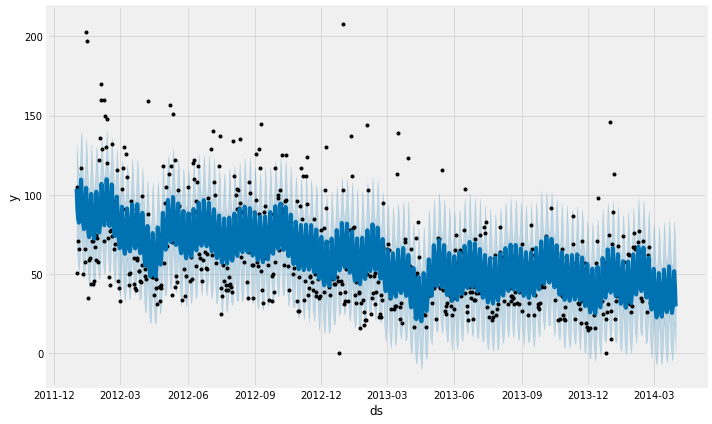

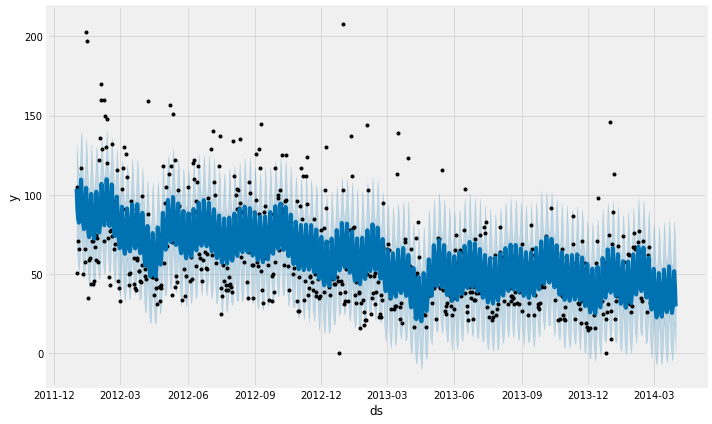

In [15]:
m.plot(forecastsDict[node],
              uncertainty=True)

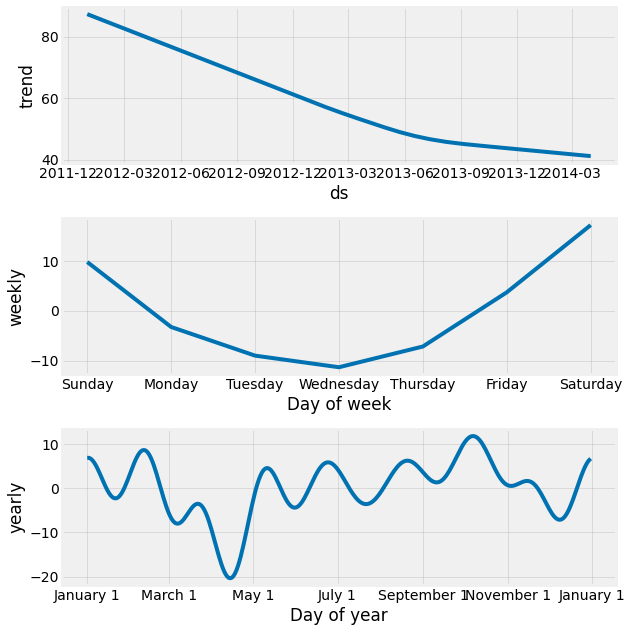

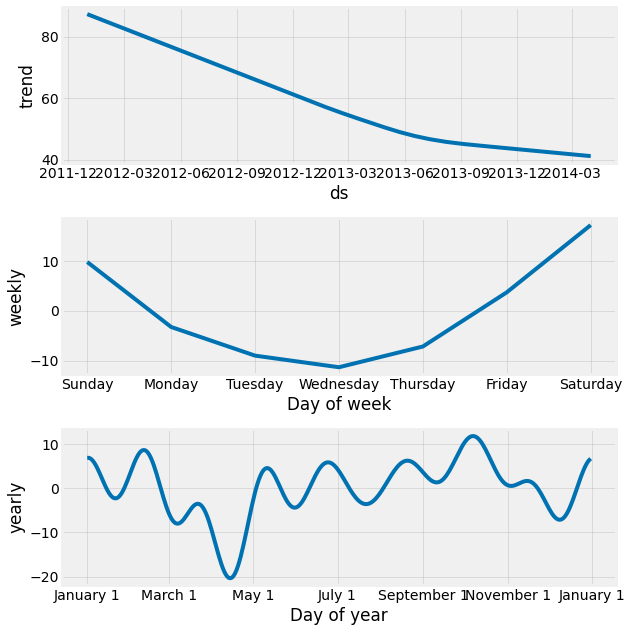

In [192]:
m.plot_components(forecastsDict[node])

The plot above provides interesting insights. The first plot shows that the monthly volume of sales has been linearly decresing over time.

The second plot highlights the fact that the weekly count of sales peaks towards the end of the week and starting of the week,less on wednesday

while the third plot shows that the less sales traffic occurs during the april month

# Instead of sum, take Mean of sales

In [3]:
train = pd.read_csv('C:\\Users\\Riyansika\\Desktop\\mith exam\\mith time series\\data.csv')
train.drop('Unnamed: 0',inplace=True,axis=1)
train.head()

,date,department_identifier,category_of_product,state,sales,outlet,product_identifier,week_id,sell_price,month,day,dayofweek,year,quarter
0,2012-01-01,11,others,Maharashtra,0,111,74,49,2.94,1,1,6,2012,1
1,2012-01-01,11,others,Maharashtra,1,111,337,49,7.44,1,1,6,2012,1
2,2012-01-01,12,others,Maharashtra,0,111,423,49,0.97,1,1,6,2012,1
3,2012-01-01,12,others,Maharashtra,0,111,432,49,4.97,1,1,6,2012,1
4,2012-01-01,21,fast_moving_consumer_goods,Maharashtra,0,111,581,49,4.88,1,1,6,2012,1


In [4]:
monthly_shop_sales=train.groupby(["date","outlet"])["sales"].mean()
# get the shops to the columns
monthly_shop_sales=monthly_shop_sales.unstack(level=1)
monthly_shop_sales=monthly_shop_sales.fillna(0)
dates=monthly_shop_sales.index
monthly_shop_sales.index=dates
monthly_shop_sales=monthly_shop_sales.reset_index()
monthly_shop_sales

outlet,date,111,112,113,114,221,222,223,331,332,333
0,2012-01-01,0.70,1.86,2.28,0.74,2.00,1.92,0.76,1.06,0.74,1.02
1,2012-01-02,1.86,2.46,2.30,0.88,1.42,1.58,1.46,1.72,1.42,2.10
2,2012-01-03,1.22,1.28,2.20,0.98,0.98,1.84,0.78,0.86,0.86,1.42
3,2012-01-04,1.32,1.44,1.64,0.84,1.08,1.34,1.44,0.98,2.54,1.32
4,2012-01-05,1.20,1.32,2.00,0.58,1.14,1.10,1.76,1.06,1.80,1.68
...,...,...,...,...,...,...,...,...,...,...,...
785,2014-02-24,1.18,0.76,1.40,1.04,0.80,1.16,0.70,0.80,1.18,0.64
786,2014-02-25,1.20,0.54,1.82,0.48,0.56,1.24,0.52,0.54,1.14,0.68
787,2014-02-26,0.84,0.84,1.30,0.98,0.62,0.74,0.58,0.66,1.36,0.62
788,2014-02-27,0.74,0.72,1.48,0.68,0.62,0.70,0.70,0.74,1.24,0.58


In [6]:
monthly_shop_sales.date= pd.to_datetime(monthly_shop_sales.date,dayfirst=True)

In [7]:
monthly_shop_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 11 columns):
date    790 non-null datetime64[ns]
111     790 non-null float64
112     790 non-null float64
113     790 non-null float64
114     790 non-null float64
221     790 non-null float64
222     790 non-null float64
223     790 non-null float64
331     790 non-null float64
332     790 non-null float64
333     790 non-null float64
dtypes: datetime64[ns](1), float64(10)
memory usage: 68.0 KB


In [9]:
from fbprophet import Prophet
import time
start_time=time.time()
forecastsDict = {}
for node in np.arange(0,10,1):
    # take the date-column and the col to be forecasted
    nodeToForecast = pd.concat([monthly_shop_sales.iloc[:,0], monthly_shop_sales.iloc[:, node+1]], axis = 1)
#     print(nodeToForecast.head())  # just to check
# rename for prophet compatability
    nodeToForecast = nodeToForecast.rename(columns = {nodeToForecast.columns[0] : 'ds'})
    nodeToForecast = nodeToForecast.rename(columns = {nodeToForecast.columns[1] : 'y'})
    growth = 'linear'
    m = Prophet(growth, yearly_seasonality=True)
    m.fit(nodeToForecast)
    future = m.make_future_dataframe(periods = 31, freq = 'D')
    forecastsDict[node] = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

In [10]:
nCols = len(list(forecastsDict.keys()))+1
for key in range(0, nCols-1):
    f1 = np.array(forecastsDict[key].yhat)
    f2 = f1[:, np.newaxis]
    if key==0:
        predictions=f2.copy()
       # print(predictions.shape)
    else:
        predictions = np.concatenate((predictions, f2), axis = 1)

In [11]:
cal=['111','112','113','114','221','222','223','331','332','333']
predictions = pd.DataFrame(predictions,columns=cal)
predictions

,111,112,113,114,221,222,223,331,332,333
0,1.820507,1.917227,2.772892,0.810428,1.591977,2.000808,1.470955,1.517762,1.479104,2.077228
1,1.466345,1.346995,2.361419,0.689555,1.233564,1.563068,1.320072,1.209239,1.179289,1.817128
2,1.287225,1.276717,2.183847,0.600084,1.141873,1.389000,1.220683,1.116355,1.176210,1.700371
3,1.205196,1.272713,2.138333,0.618048,1.142835,1.366261,1.183087,1.086443,1.187770,1.649634
4,1.205330,1.297213,2.077930,0.590096,1.119370,1.364531,1.132288,1.110721,1.105091,1.726258
...,...,...,...,...,...,...,...,...,...,...
816,1.231456,0.623763,1.440082,0.739758,0.625251,0.545876,0.399031,0.768234,1.624381,0.581993
817,1.454874,0.907624,1.632624,0.824675,0.727492,0.715886,0.528546,0.930537,1.678039,0.785696
818,1.825614,1.427744,2.084896,0.961066,0.987553,1.132946,0.694333,1.280163,1.952368,1.039270
819,1.753092,1.238856,2.156648,0.954496,1.064627,1.104051,0.687011,1.067144,1.860780,0.873443


In [12]:
forecastsDict[node][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2012-01-01,2.077228,1.485725,2.677974
1,2012-01-02,1.817128,1.230884,2.400364
2,2012-01-03,1.700371,1.104790,2.356108
3,2012-01-04,1.649634,1.068960,2.220014
4,2012-01-05,1.726258,1.163530,2.372798
...,...,...,...,...
816,2014-03-27,0.581993,-0.033146,1.189647
817,2014-03-28,0.785696,0.192864,1.372716
818,2014-03-29,1.039270,0.448900,1.653225
819,2014-03-30,0.873443,0.262063,1.528532


In [13]:
predictions.tail(31)

,111,112,113,114,221,222,223,331,332,333
790,1.550452,1.522230,2.246985,0.847019,0.746076,1.142614,0.740439,1.274424,1.633143,1.067773
791,1.480233,1.323693,2.306184,0.840665,0.782902,1.103191,0.727262,1.054527,1.555521,0.905231
792,1.148311,0.754400,1.887671,0.726387,0.425033,0.661533,0.577359,0.767251,1.271042,0.632203
793,0.995152,0.684118,1.704249,0.643740,0.336514,0.490964,0.481356,0.697708,1.293825,0.507262
794,0.942414,0.679077,1.653920,0.668588,0.343332,0.478781,0.449348,0.692826,1.340864,0.453125
795,0.974703,0.701454,1.589575,0.647418,0.328422,0.494140,0.406105,0.743396,1.302130,0.531064
796,1.211248,0.973625,1.769960,0.734147,0.398018,0.670383,0.533896,0.901083,1.398793,0.745636
797,1.598077,1.481182,2.207343,0.872842,0.630578,1.096050,0.699236,1.247057,1.721086,1.014687
798,1.544057,1.279107,2.261538,0.869025,0.685677,1.077427,0.692631,1.031396,1.680793,0.868578
799,1.226899,0.706763,1.837969,0.756862,0.347638,0.654774,0.549137,0.748310,1.428666,0.611733


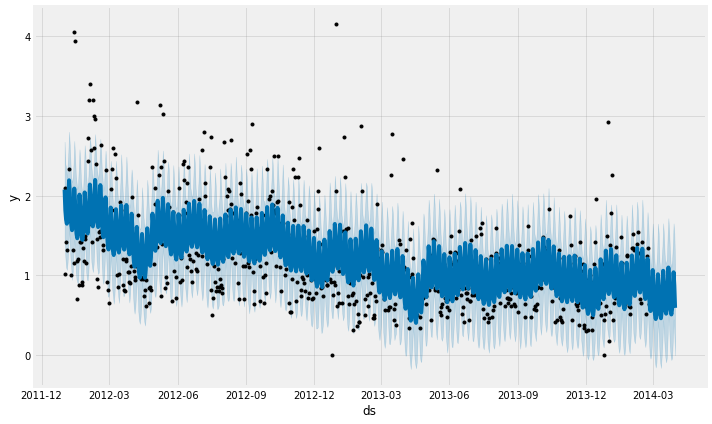

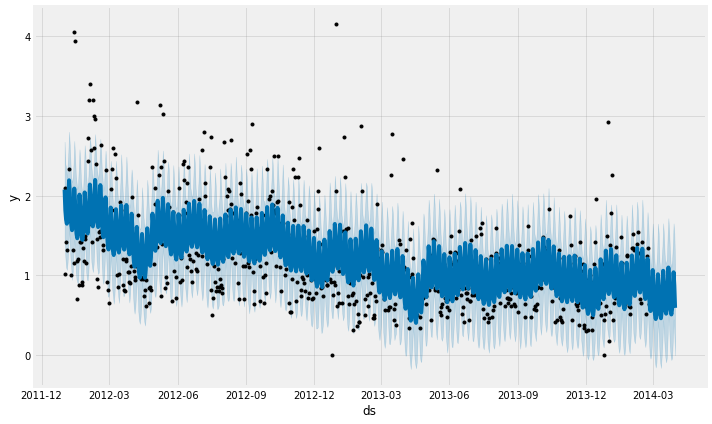

In [14]:
m.plot(forecastsDict[node],
              uncertainty=True)

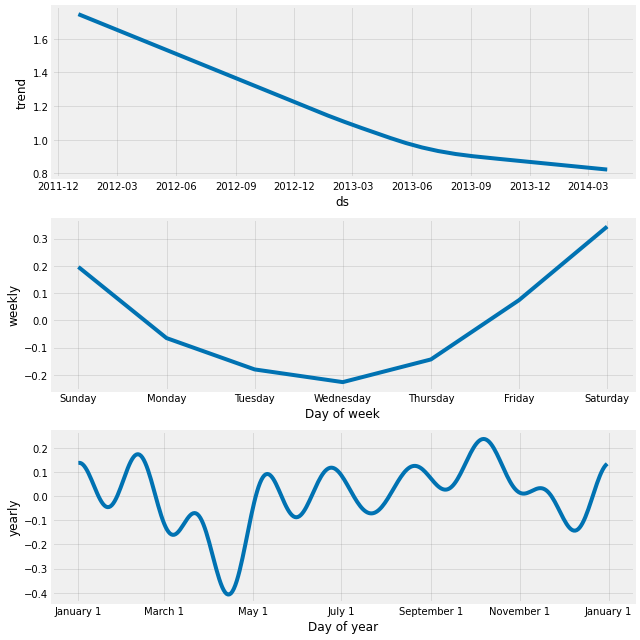

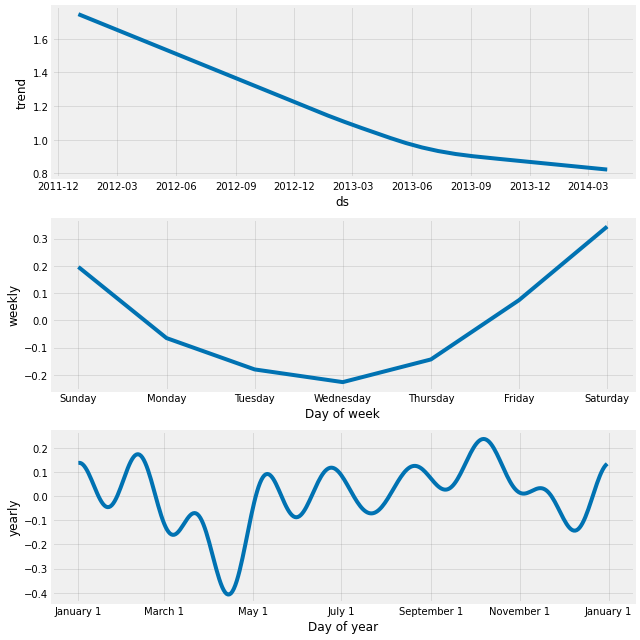

In [15]:
m.plot_components(forecastsDict[node])
